In [1]:
import geopandas as gpd
import pandas as pd
import os

PLACES OF WORKSHIP

In [2]:
# Load Places of worship (area), take centroid
gdf_pofw = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_pofw_a_free_1.shp'))
gdf_pofw.to_crs(epsg=27700, inplace=True)
gdf_pofw['geometry'] = gdf_pofw.centroid

# Load Places of worship (point)
gdf_pofw_pt = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_pofw_free_1.shp'))
gdf_pofw_pt.to_crs(epsg=27700, inplace=True)

# Merge two datasets together
gdf_pofw_merged = pd.concat([gdf_pofw, gdf_pofw_pt], ignore_index=True)
gdf_pofw_merged['category']='religious'
gdf_pofw_merged.tail()

osm_id  code                 fclass  \
3096  11479357650  3103  christian_evangelical   
3097  11543657111  3300                 muslim   
3098  11544241893  3100              christian   
3099  11780635078  3300                 muslim   
3100  11780635081  3300                 muslim   

                                       name                       geometry  \
3096                       UCKG Help Centre  POINT (539092.764 184583.684)   
3097           Chadwell Heath Muslim Centre  POINT (547336.060 187774.258)   
3098          West Wickham Methodist Church  POINT (538761.375 165985.736)   
3099  Limehouse Bangladeshi Cultural Centre  POINT (536918.189 180871.930)   
3100                                   None  POINT (536935.615 180861.505)   

       category  
3096  religious  
3097  religious  
3098  religious  
3099  religious  
3100  religious

Text(0.5, 1.0, 'Places of Worship')

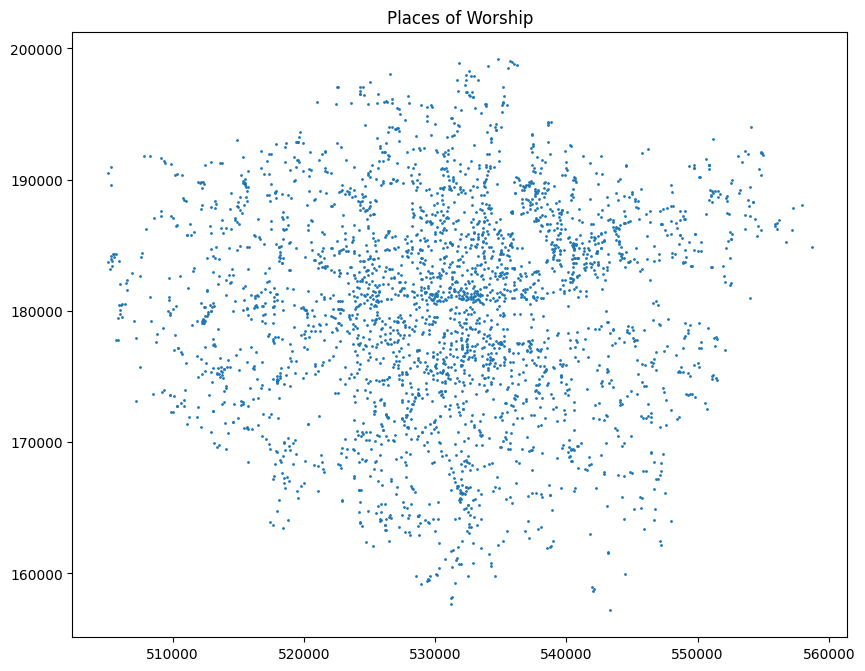

In [3]:
# Plot Places of worship
gdf_pofw_merged.plot(markersize=1, figsize=(10,10),).set_title('Places of Worship')

POINT OF INTEREST

In [4]:
# Load Points of interest (area), take centroid
gdf_poi = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_pois_a_free_1.shp'))
gdf_poi.to_crs(epsg=27700, inplace=True)
gdf_poi['geometry'] = gdf_poi.centroid

# Load Points of interest (point)
gdf_poi_pt = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_pois_free_1.shp'))
gdf_poi_pt.to_crs(epsg=27700, inplace=True)

# Merge two datasets together
gdf_poi_merged = pd.concat([gdf_poi, gdf_poi_pt], ignore_index=True)
gdf_poi_merged.tail()

osm_id  code        fclass                        name  \
134864  11871881153  2561   hairdresser  AB Barbers, Nails & Beauty   
134865  11871885714  2301    restaurant      We Are Mixed Blessings   
134866  11871901022  2561   hairdresser                Back To Eden   
134867  11871927672  2542  bicycle_shop         Community Bike Shop   
134868  11871927780  2561   hairdresser               Lugie’s Salon   

                             geometry  
134864  POINT (532435.230 177888.268)  
134865  POINT (532429.509 177860.099)  
134866  POINT (532419.012 177829.113)  
134867  POINT (531800.451 177392.099)  
134868  POINT (532402.866 177793.318)

In [74]:
# add new column, extract first 2 digits of code column
gdf_poi_merged['category_code'] = gdf_poi_merged['code'].astype('string').str[:2]

# add new column, value depends on category column, 20 is restaurant, 25 is culture
poi_dict = {
    '20':'public_facilities',
    '21':'medical',
    '22':'culture_leisure',
    '23':'restaurants',
    '24':'hotels',
    '25':'shopping',
    '26':'banking',
    '27':'tourism',
    '29':'miscellaneous'
    }

gdf_poi_merged['category'] = gdf_poi_merged['category_code'].map(poi_dict)
#drop category code
gdf_poi_merged.drop(columns=['category_code'], inplace=True)


osm_id  code        fclass                        name  \
134864  11871881153  2561   hairdresser  AB Barbers, Nails & Beauty   
134865  11871885714  2301    restaurant      We Are Mixed Blessings   
134866  11871901022  2561   hairdresser                Back To Eden   
134867  11871927672  2542  bicycle_shop         Community Bike Shop   
134868  11871927780  2561   hairdresser               Lugie’s Salon   

                             geometry     category  
134864  POINT (532435.230 177888.268)     shopping  
134865  POINT (532429.509 177860.099)  restaurants  
134866  POINT (532419.012 177829.113)     shopping  
134867  POINT (531800.451 177392.099)     shopping  
134868  POINT (532402.866 177793.318)     shopping

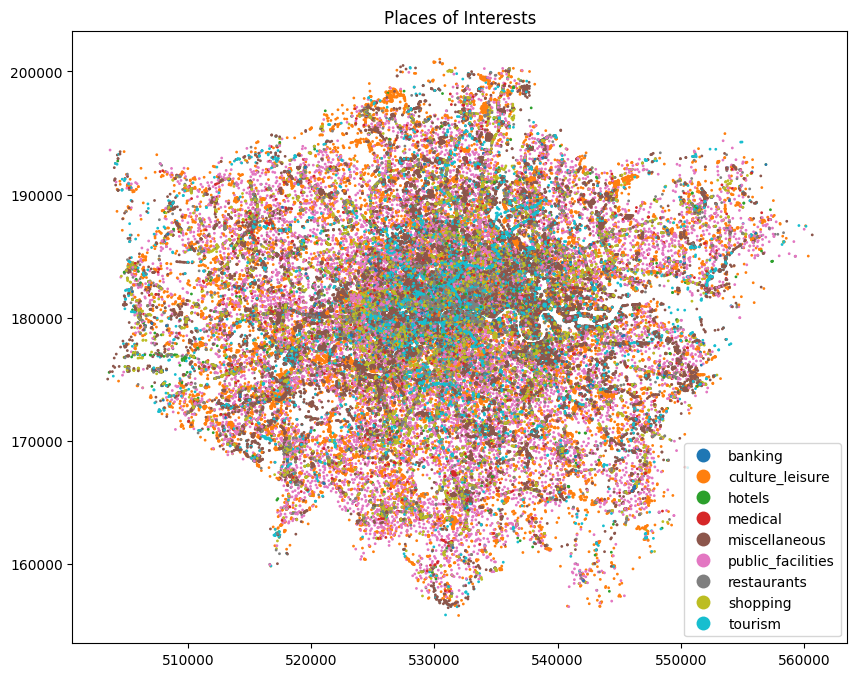

In [75]:
# Plot
gdf_poi_merged.plot(markersize=1, figsize=(10,10),column='category',legend=True).set_title('Places of Interests')
gdf_poi_merged.tail()

TRANSPORT

In [8]:
transport_list =['bus_station','railway_station','airport','ferry_terminal','airfield','taxi','helipad']

In [9]:
# load transport
gdf_transport = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_transport_free_1.shp'))
gdf_transport.to_crs(epsg=27700, inplace=True)
gdf_transport = gdf_transport[gdf_transport.fclass.isin(transport_list)]

# load transport (area), take centroids
gdf_transport_a = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_transport_a_free_1.shp'))
gdf_transport_a.to_crs(epsg=27700, inplace=True)
gdf_transport_a['geometry'] = gdf_transport_a.centroid
gdf_transport_a = gdf_transport_a[gdf_transport_a.fclass.isin(transport_list)]

# merge
gdf_transport_merged = pd.concat([gdf_transport, gdf_transport_a], ignore_index=True)
gdf_transport_merged['category']='transport'

osm_id  code   fclass                     name  \
1025  1226993763  5641     taxi                     None   
1026  1226993764  5641     taxi                     None   
1027  1229484499  5641     taxi                     None   
1028  1230665737  5655  helipad  Foxtrot Taxiway Helipad   
1029  1244577739  5655  helipad                     None   

                           geometry   category  
1025  POINT (537869.985 183491.280)  transport  
1026  POINT (537815.611 183439.870)  transport  
1027  POINT (538625.266 184315.342)  transport  
1028  POINT (541578.828 160176.968)  transport  
1029  POINT (552424.820 178880.401)  transport

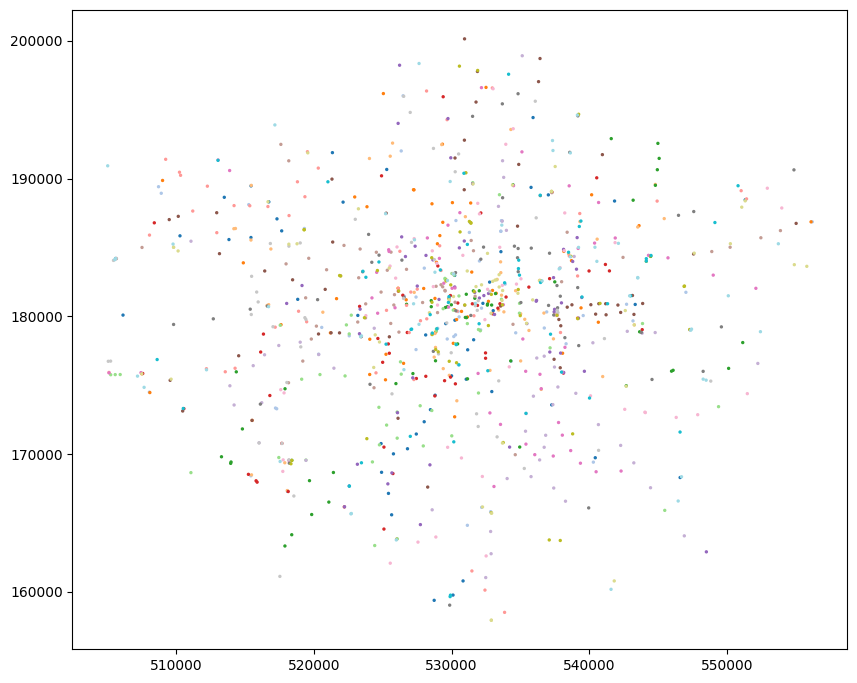

In [10]:
# plot and color by fclass
gdf_transport_merged.plot(markersize=2, figsize=(10,10),legend=True,cmap='tab20')
gdf_transport_merged.tail()

MERGE EVERYTHING

Text(0.5, 1.0, 'All Points of Interest')

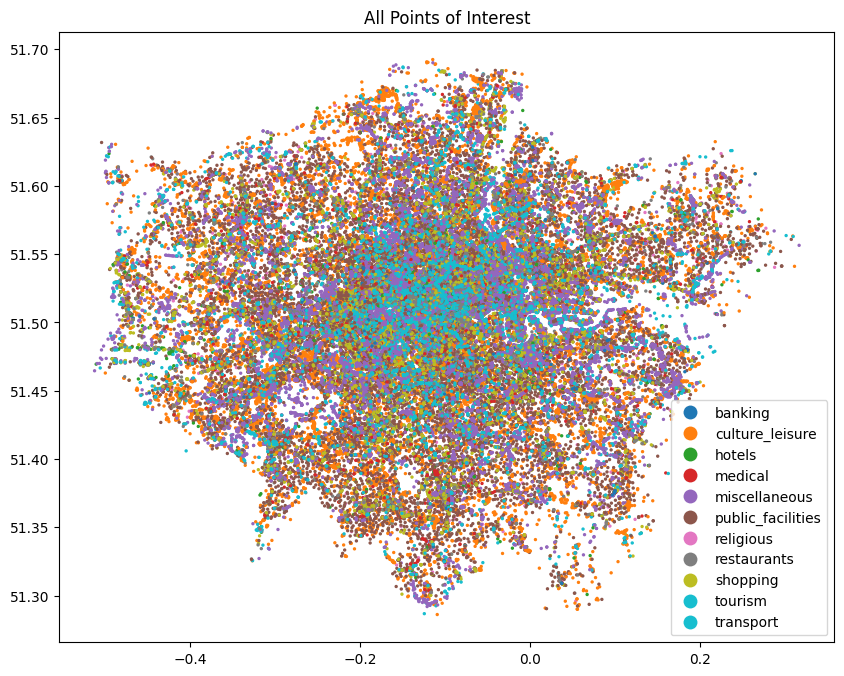

In [76]:
# Merge everything
gdf_poi_all = pd.concat([gdf_pofw_merged, gdf_poi_merged, gdf_transport_merged], ignore_index=True)
gdf_poi_all.to_crs(epsg=4326, inplace=True)
# plot
gdf_poi_all.plot(markersize=2, figsize=(10,10),column='category',legend=True).set_title('All Points of Interest')

In [136]:
gdf_poi_all.tail()

osm_id  code   fclass                     name  \
138995  1226993763  5641     taxi                     None   
138996  1226993764  5641     taxi                     None   
138997  1229484499  5641     taxi                     None   
138998  1230665737  5655  helipad  Foxtrot Taxiway Helipad   
138999  1244577739  5655  helipad                     None   

                         geometry   category               h3  
138995  POINT (-0.01367 51.53350)  transport  89194e6994fffff  
138996  POINT (-0.01447 51.53305)  transport  89194e6994fffff  
138997  POINT (-0.00246 51.54072)  transport  89194e699c7ffff  
138998   POINT (0.03046 51.32308)  transport  89194ad512bffff  
138999   POINT (0.19402 51.48833)  transport  89194e6c417ffff

#### AGGREGATE BY OA

In [125]:
# Load OA shapefile
oa = gpd.read_file(os.path.join('data','statistical-gis-boundaries-london','ESRI','OA_2011_London_gen_MHW.shp'))
oa.to_crs(epsg=4326, inplace=True)

# OA11 -> OA21 conversion
oa_21 = gpd.read_file(os.path.join('data','oa11tooa21.geojson'))
oa['OA21CD'] = oa['OA11CD'].map(oa_21.set_index('OA11CD')['OA21CD'])


In [126]:
# Spatial join, summarise by count for each category
poi_oa = gpd.sjoin(gdf_poi_all, oa, how='inner', predicate='intersects')
poi_oa_summary = poi_oa.groupby(['OA21CD','category']).size().reset_index(name='count')
poi_oa_summary = poi_oa_summary.pivot(index='OA21CD', columns='category', values='count').fillna(0)
poi_oa_summary.head()

# rejoin oa
poi_oa_count = oa.merge(poi_oa_summary, on='OA21CD', how='left')

poi_oa_count.head()


OA11CD   LSOA11CD   MSOA11CD  WD11CD_BF    WD11NM_BF    LAD11CD  \
0  E00023264  E01004612  E02000954  E05000626      Tooting  E09000032   
1  E00003359  E01000692  E02000128  E05000111  Chislehurst  E09000006   
2  E00023266  E01004615  E02000956  E05000626      Tooting  E09000032   
3  E00020264  E01004027  E02000809  E05000548    Riverside  E09000028   
4  E00023263  E01004613  E02000955  E05000626      Tooting  E09000032   

      LAD11NM    RGN11CD RGN11NM         LSOA11NM  ... culture_leisure  \
0  Wandsworth  E12000007  London  Wandsworth 032C  ...             0.0   
1     Bromley  E12000007  London     Bromley 002D  ...             0.0   
2  Wandsworth  E12000007  London  Wandsworth 034B  ...             2.0   
3   Southwark  E12000007  London   Southwark 003E  ...             3.0   
4  Wandsworth  E12000007  London  Wandsworth 033D  ...             0.0   

   hotels  medical  miscellaneous  public_facilities  religious  restaurants  \
0     0.0      0.0            0.0                0.0        0.0          0.0   
1     0.0      3.0            3.0                3.0        1.0         11.0   
2     0.0      0.0            0.0                1.0        0.0          0.0   
3     1.0      0.0           12.0                2.0        0.0          5.0   
4     0.0      0.0            0.0                2.0        0.0          0.0   

  shopping tourism  transport  
0      1.0     0.0        0.0  
1      6.0     0.0        0.0  
2      0.0     0.0        0.0  
3      0.0     3.0        0.0  
4      0.0     0.0        0.0  

[5 rows x 30 columns]

Text(0.5, 1.0, 'POIs by type')

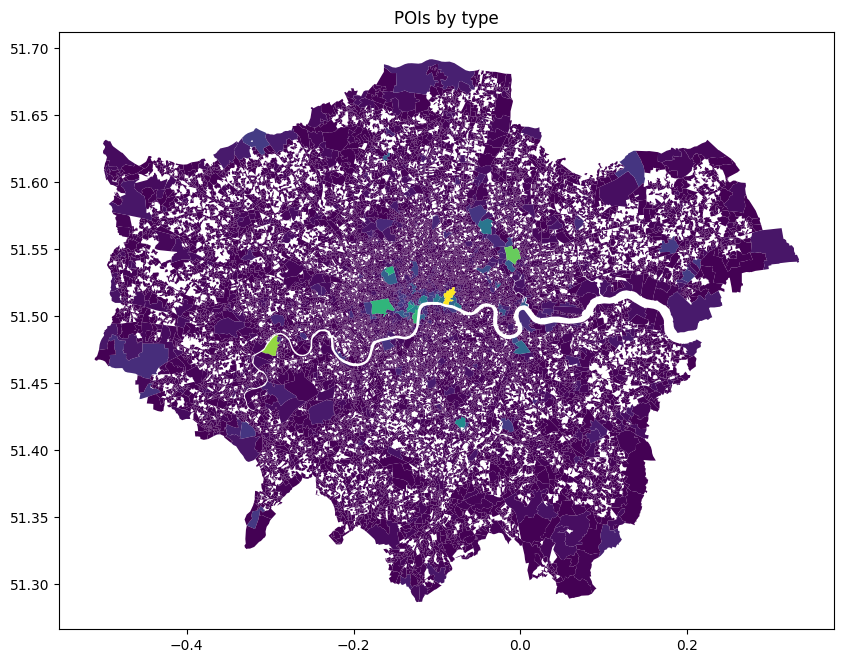

In [127]:
poi_oa_count.plot(figsize=(10,10),column='tourism').set_title('POIs by type')

In [129]:
#export to geojson
poi_oa_count.to_file(os.path.join('data','poi_oa_count.geojson'), driver='GeoJSON')

#### AGGREGATE BY H3 level 9

In [78]:
# !pip install h3
import h3

In [131]:
res = 9
def lat_lng_to_h3(row):
    return h3.geo_to_h3(
        row.geometry.y, row.geometry.x, res
    )
gdf_poi_all["h3"] = gdf_poi_all.apply(lat_lng_to_h3, axis = 1)
gdf_poi_all.head()


osm_id  code              fclass                    name  \
0  4076420  3101  christian_anglican               St Brides   
1  4366294  3101  christian_anglican  Saint Anne's Limehouse   
2  4413620  3100           christian    Good Shepherd Church   
3  4962595  3100           christian        Church of God UK   
4  4969133  3101  christian_anglican     Saint Mary's Church   

                    geometry   category               h3  
0  POINT (-0.10547 51.51379)  religious  89194ad328fffff  
1  POINT (-0.03028 51.51168)  religious  89194ad35b7ffff  
2   POINT (0.00989 51.42684)  religious  89194ad2b4bffff  
3   POINT (0.04526 51.55138)  religious  89194e68e07ffff  
4  POINT (-0.10170 51.53841)  religious  89194ad36c3ffff

In [132]:
# Aggregate by count by type
poi_h3_count = places_gdf.groupby(['h3_09','category_main']).size().reset_index(name='count')
poi_h3_count = poi_h3_count.pivot(index='h3_09', columns='category_main', values='count').fillna(0)
poi_h3_count['total'] = poi_h3_count.sum(axis=1) #add total

#reset index to h3, drop category
poi_h3_count.reset_index(inplace=True)
poi_h3_count.columns.name = None
poi_h3_count.head()

h3  banking  culture_leisure  hotels  medical  miscellaneous  \
0  89194ac0007ffff      0.0              0.0     0.0      0.0            0.0   
1  89194ac000bffff      0.0              0.0     0.0      3.0            0.0   
2  89194ac001bffff      0.0              0.0     0.0      1.0            0.0   
3  89194ac0023ffff      0.0              1.0     0.0      0.0            0.0   
4  89194ac0027ffff      0.0              0.0     0.0      0.0            0.0   

   public_facilities  religious  restaurants  shopping  tourism  transport  \
0                1.0        0.0          1.0       4.0      0.0        0.0   
1                0.0        2.0          0.0       0.0      0.0        0.0   
2                1.0        1.0          0.0       0.0      0.0        0.0   
3                0.0        0.0          0.0       0.0      0.0        0.0   
4                1.0        0.0          0.0       0.0      0.0        0.0   

   total  
0    6.0  
1    5.0  
2    3.0  
3    1.0  
4    1.0

In [133]:
# Converto to polygons to visualise
from shapely.geometry import Polygon

def add_geometry(row):
    points = h3.h3_to_geo_boundary(row["h3"],True)
    return Polygon(points)

#geometry column
poi_h3_count["geometry"] = poi_h3_count.apply(add_geometry, axis = 1)

#convert gdf
poi_h3_count = gpd.GeoDataFrame(poi_h3_count, crs = "EPSG:4326")
poi_h3_count.tail()

h3  banking  culture_leisure  hotels  medical  \
12713  89195db6b87ffff      0.0              1.0     0.0      0.0   
12714  89195db6b8fffff      0.0              0.0     0.0      0.0   
12715  89195db6ba7ffff      0.0              0.0     0.0      0.0   
12716  89195db6babffff      0.0              3.0     0.0      0.0   
12717  89195db6bafffff      0.0              0.0     0.0      0.0   

       miscellaneous  public_facilities  religious  restaurants  shopping  \
12713            0.0                0.0        0.0          0.0       0.0   
12714            0.0                0.0        0.0          8.0      11.0   
12715            0.0                0.0        0.0          0.0       1.0   
12716            0.0                0.0        0.0          0.0       0.0   
12717            0.0                1.0        0.0          0.0       0.0   

       tourism  transport  total  \
12713      0.0        0.0    1.0   
12714      0.0        0.0   19.0   
12715      0.0        0.0    1.0   
12716      0.0        0.0    3.0   
12717      0.0        0.0    1.0   

                                                geometry  
12713  POLYGON ((-0.02735 51.68618, -0.02945 51.68521...  
12714  POLYGON ((-0.03198 51.68598, -0.03408 51.68500...  
12715  POLYGON ((-0.02310 51.67844, -0.02519 51.67746...  
12716  POLYGON ((-0.03068 51.68074, -0.03278 51.67977...  
12717  POLYGON ((-0.02772 51.67823, -0.02982 51.67725...

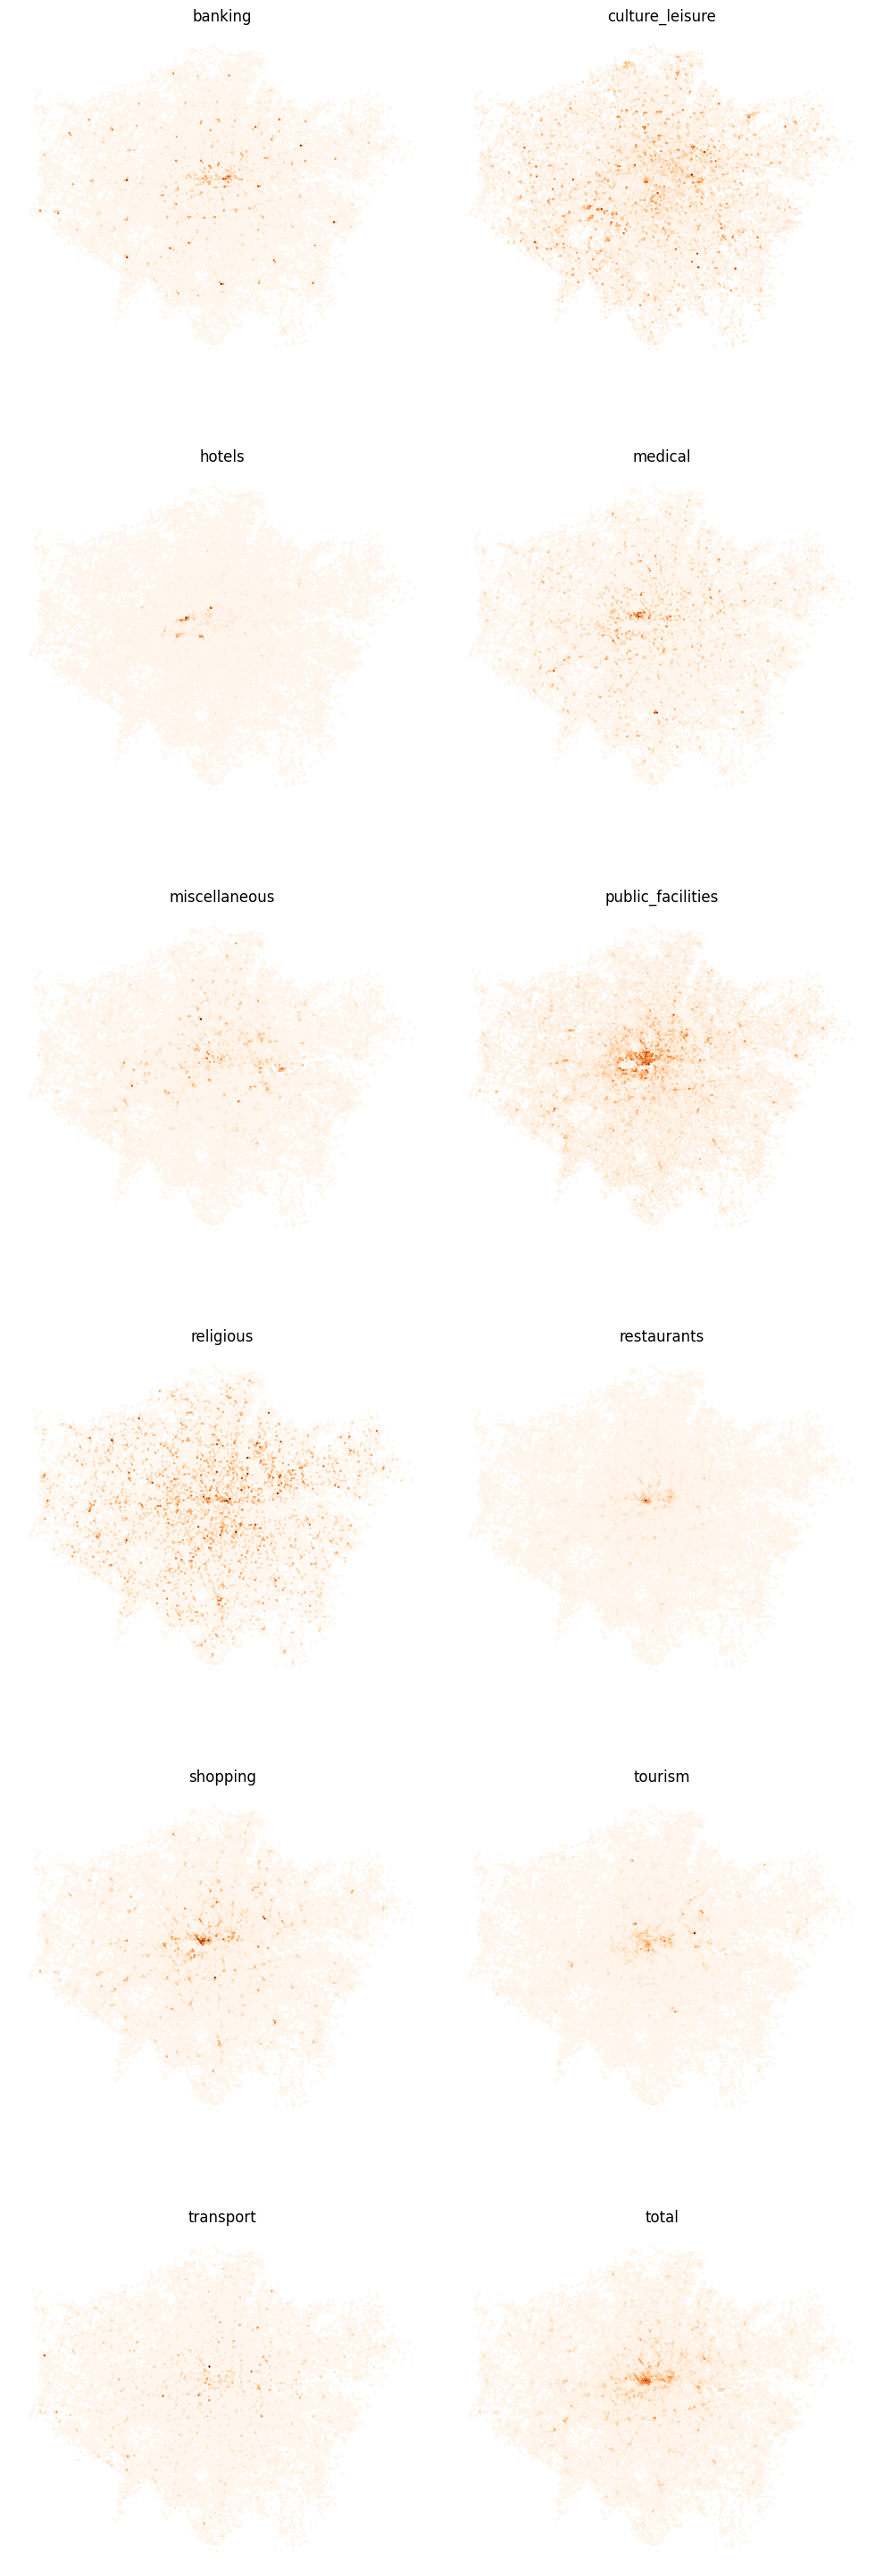

In [134]:
#loop through categories and plot

import matplotlib.pyplot as plt
fig, axs = plt.subplots(6, 2, figsize=(10, 30))
for i, category in enumerate(poi_h3_count.columns[1:-1]):
    ax = axs[i//2, i%2]
    poi_h3_count.plot(column=category, ax=ax, legend=False, cmap='Oranges')
    ax.set_title(category)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [135]:
#export to geojson
poi_h3_count.to_file(os.path.join('data','poi_h3_count.geojson'), driver='GeoJSON')